In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels

In [2]:
# read dataframe
path = 'fuel poverty 2.0.csv'
df = pd.read_csv(path)

In [3]:
# check some example numbers
df.head()

,Old Ward Code,New ward code,Ward,% Households without central heating - 2001,Cavity walls that are uninsulated (2010),Lofts with less than 150mm insulation (2010),Indices of Deprivation 2010 Health Deprivation and Disability domain,SMR - 2010,Incapacity Benefit rate - 2010,% aged 60 or over - 2010,Pension Credit rate - 2010,JSA claimant rate - 2010,Income Support rate - 2010,% of children in poverty - 2009,% of households fuel poor (2009)
0,00AA,E09000001,City of London,4.6,69.4,73.8,-1.43,73.8,2.6,16.8,12.6,1.2,1.6,17.5,6.5
1,00ABFX,E05000026,Abbey,9.9,68.6,72.9,0.27,65.7,4.8,10.8,29.6,4.9,6.2,40.3,16.2
2,00ABFY,E05000027,Alibon,7.9,64.9,73.5,0.56,83.8,8.6,17.0,35.7,6.5,10.8,38.8,18.9
3,00ABFZ,E05000028,Becontree,11.7,58.4,73.3,0.46,111.2,7.5,13.2,40.0,5.9,7.8,37.9,17.3
4,00ABGA,E05000029,Chadwell Heath,14.7,69.4,66.3,0.46,88.5,7.6,24.5,27.4,5.5,8.8,39.0,16.8


In [4]:
# print the shape of the DataFrame
df.shape

(679, 15)

In [5]:
# print the column names
df.columns

Index(['Old Ward Code', 'New ward code', 'Ward',
       '% Households without central heating - 2001',
       'Cavity walls that are uninsulated (2010)',
       'Lofts with less than 150mm insulation (2010)',
       'Indices of Deprivation 2010 Health Deprivation and Disability domain',
       'SMR - 2010', 'Incapacity Benefit rate - 2010',
       '% aged 60 or over - 2010', 'Pension Credit rate - 2010',
       'JSA claimant rate - 2010', 'Income Support rate - 2010',
       '% of children in poverty - 2009', '% of households fuel poor (2009)'],
      dtype='object')

In [6]:
# rename columns
df_rename = df.rename(columns = {'% Households without central heating - 2001':'housing_without_heating',
                                 'Cavity walls that are uninsulated (2010)':'housing_walls_uninsulated',
                                 'Lofts with less than 150mm insulation (2010)':'housing_less_insulation',
                                 'Indices of Deprivation 2010 Health Deprivation and Disability domain':'health_deprivation',
                                 'SMR - 2010':'health_SMR',
                                 'Incapacity Benefit rate - 2010':'health_incapacity_benefit',
                                 '% aged 60 or over - 2010':'older_people_aged_60',
                                 'Pension Credit rate - 2010':'older_people_pension',
                                 'JSA claimant rate - 2010':'worklessness_JSA',
                                 'Income Support rate - 2010':'poverty_income_support',
                                 '% of children in poverty - 2009':'poverty_child',
                                 '% of households fuel poor (2009)':'poverty_fuel_poor'})
df_rename.columns

Index(['Old Ward Code', 'New ward code', 'Ward', 'housing_without_heating',
       'housing_walls_uninsulated', 'housing_less_insulation',
       'health_deprivation', 'health_SMR', 'health_incapacity_benefit',
       'older_people_aged_60', 'older_people_pension', 'worklessness_JSA',
       'poverty_income_support', 'poverty_child', 'poverty_fuel_poor'],
      dtype='object')

In [7]:
# pick the columns that we need
df_pick = df_rename.loc[:,['housing_without_heating', 'housing_walls_uninsulated', 'housing_less_insulation',
                           'health_deprivation', 'health_SMR', 'health_incapacity_benefit',
                           'older_people_aged_60', 'older_people_pension',
                           'worklessness_JSA',
                           'poverty_income_support', 'poverty_child', 'poverty_fuel_poor']]
df_pick.columns

Index(['housing_without_heating', 'housing_walls_uninsulated',
       'housing_less_insulation', 'health_deprivation', 'health_SMR',
       'health_incapacity_benefit', 'older_people_aged_60',
       'older_people_pension', 'worklessness_JSA', 'poverty_income_support',
       'poverty_child', 'poverty_fuel_poor'],
      dtype='object')

In [8]:
# check datatype
df_pick.dtypes

housing_without_heating      float64
housing_walls_uninsulated    float64
housing_less_insulation      float64
health_deprivation           float64
health_SMR                   float64
health_incapacity_benefit    float64
older_people_aged_60         float64
older_people_pension         float64
worklessness_JSA             float64
poverty_income_support       float64
poverty_child                float64
poverty_fuel_poor            float64
dtype: object

<AxesSubplot:xlabel='poverty_child', ylabel='poverty_fuel_poor'>

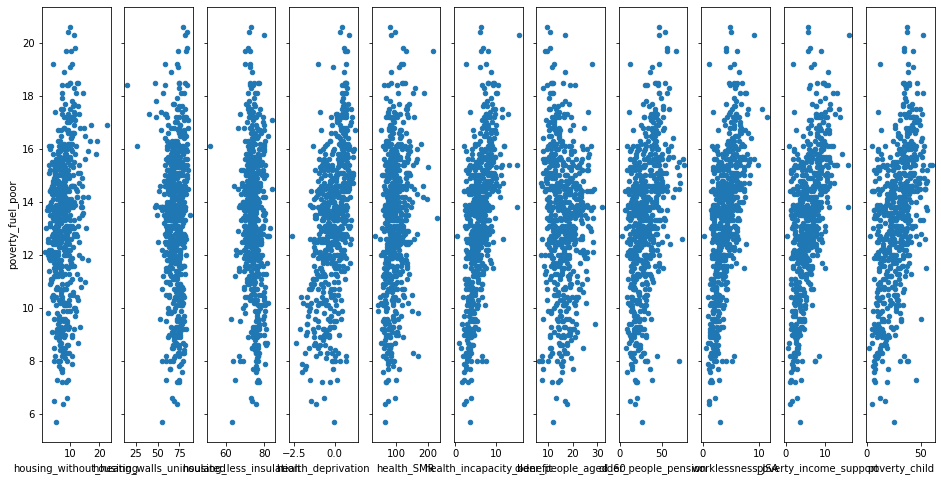

In [9]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 11, sharey=True)
df_pick.plot(kind='scatter', x='housing_without_heating', y='poverty_fuel_poor', ax=axs[0], figsize=(16, 8))
df_pick.plot(kind='scatter', x='housing_walls_uninsulated', y='poverty_fuel_poor', ax=axs[1])
df_pick.plot(kind='scatter', x='housing_less_insulation', y='poverty_fuel_poor', ax=axs[2])
df_pick.plot(kind='scatter', x='health_deprivation', y='poverty_fuel_poor', ax=axs[3])
df_pick.plot(kind='scatter', x='health_SMR', y='poverty_fuel_poor', ax=axs[4])
df_pick.plot(kind='scatter', x='health_incapacity_benefit', y='poverty_fuel_poor', ax=axs[5])
df_pick.plot(kind='scatter', x='older_people_aged_60', y='poverty_fuel_poor', ax=axs[6])
df_pick.plot(kind='scatter', x='older_people_pension', y='poverty_fuel_poor', ax=axs[7])
df_pick.plot(kind='scatter', x='worklessness_JSA', y='poverty_fuel_poor', ax=axs[8])
df_pick.plot(kind='scatter', x='poverty_income_support', y='poverty_fuel_poor', ax=axs[9])
df_pick.plot(kind='scatter', x='poverty_child', y='poverty_fuel_poor', ax=axs[10])

In [10]:
df_pick.corr()

,housing_without_heating,housing_walls_uninsulated,housing_less_insulation,health_deprivation,health_SMR,health_incapacity_benefit,older_people_aged_60,older_people_pension,worklessness_JSA,poverty_income_support,poverty_child,poverty_fuel_poor
housing_without_heating,1.000000,0.170786,0.389269,0.287208,0.074760,0.258062,-0.408032,0.291913,0.285139,0.278432,0.257267,0.184951
housing_walls_uninsulated,0.170786,1.000000,0.429029,-0.175603,-0.051637,-0.167233,-0.013047,-0.099873,-0.109349,-0.186220,-0.166662,-0.004488
housing_less_insulation,0.389269,0.429029,1.000000,0.012037,-0.062687,0.033232,-0.216899,0.081150,-0.043085,0.017965,0.039029,-0.070125
health_deprivation,0.287208,-0.175603,0.012037,1.000000,0.397298,0.767408,-0.603663,0.804364,0.776067,0.770857,0.812780,0.491723
health_SMR,0.074760,-0.051637,-0.062687,0.397298,1.000000,0.343888,-0.346415,0.491008,0.383315,0.360537,0.325993,0.244125
health_incapacity_benefit,0.258062,-0.167233,0.033232,0.767408,0.343888,1.000000,-0.413905,0.763310,0.865611,0.962621,0.855228,0.576482
older_people_aged_60,-0.408032,-0.013047,-0.216899,-0.603663,-0.346415,-0.413905,1.000000,-0.764667,-0.516917,-0.471916,-0.605704,-0.065773
older_people_pension,0.291913,-0.099873,0.081150,0.804364,0.491008,0.763310,-0.764667,1.000000,0.797426,0.770754,0.844020,0.436156
worklessness_JSA,0.285139,-0.109349,-0.043085,0.776067,0.383315,0.865611,-0.516917,0.797426,1.000000,0.897436,0.832672,0.603741
poverty_income_support,0.278432,-0.186220,0.017965,0.770857,0.360537,0.962621,-0.471916,0.770754,0.897436,1.000000,0.889243,0.568301


In [11]:
# This performs a multiple regression of expectancy against recycling:

reg_income = smf.ols(formula='poverty_fuel_poor ~ housing_without_heating + housing_walls_uninsulated + housing_less_insulation + health_deprivation + health_SMR + health_incapacity_benefit + older_people_aged_60 + older_people_pension + worklessness_JSA + poverty_income_support + poverty_child',data=df_pick).fit()

# And this gives a big summary of the results:
print(reg_income.summary())

                            OLS Regression Results                            
Dep. Variable:      poverty_fuel_poor   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     61.17
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           4.15e-91
Time:                        07:35:49   Log-Likelihood:                -1260.5
No. Observations:                 625   AIC:                             2545.
Df Residuals:                     613   BIC:                             2598.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [12]:
# conditional number is large, so calculating VIF to check are there strong multicollinearity
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df_pick, thresh=5):
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_pick_with_const = add_constant(df_pick)

        vif_df_pick = pd.Series([variance_inflation_factor(df_pick_with_const.values, i) 
               for i in range(df_pick_with_const.shape[1])], name= "VIF",
              index=df_pick_with_const.columns).to_frame()

        # drop the const
        vif_df_pick = vif_df_pick.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df_pick.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df_pick.index[vif_df_pick.VIF == vif_df_pick.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df_pick = df_pick.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df_pick

In [15]:
# delete inf and nan
df_pick[np.isnan(df_pick)] = 0
df_pick[np.isinf(df_pick)] = 0

In [16]:
# drop columns that are strong multicollinearity
df_drop = drop_column_using_vif_(df_pick.drop('poverty_fuel_poor', axis=1))

df_drop.head()

Dropping: poverty_income_support
Dropping: housing_less_insulation
Dropping: health_incapacity_benefit
Dropping: older_people_pension
Dropping: poverty_child


,housing_without_heating,housing_walls_uninsulated,health_deprivation,health_SMR,older_people_aged_60,worklessness_JSA
0,4.6,69.4,-1.43,73.8,16.8,1.2
1,9.9,68.6,0.27,65.7,10.8,4.9
2,7.9,64.9,0.56,83.8,17.0,6.5
3,11.7,58.4,0.46,111.2,13.2,5.9
4,14.7,69.4,0.46,88.5,24.5,5.5


In [18]:
# fit a linear regression model
import statsmodels.api as sm

life_expect = sm.OLS(endog=df_pick[['poverty_fuel_poor']], exog=sm.add_constant(df_drop)).fit()
life_expect.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      poverty_fuel_poor   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     560.9
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          8.65e-258
Time:                        07:38:56   Log-Likelihood:                -1361.7
No. Observations:                 679   AIC:                             2737.
Df Residuals:                     672   BIC:                             2769.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1520      0.237      0.642      0.521      -0.313       0.617
housing_without_heating       0.1091      0.027      4.070      0.000       0.056       0.162
housing_walls_uninsulated     0.0481      0.007      7.101      0.000       0.035       0.061
health_deprivation            1.0907      0.181      6.034      0.000       0.736       1.446
health_SMR                    0.0094      0.003      3.301      0.001       0.004       0.015
older_people_aged_60          0.2873      0.017     16.828      0.000       0.254       0.321
worklessness_JSA              0.8895      0.063     14.125      0.000       0.766       1.013
==============================================================================
Omnibus:                       31.597   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.567
Skew:                           0.412   Prob(JB):                     3.46e-10
Kurtosis:                       3.927   Cond. No.                         398.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""